In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from scipy.optimize import curve_fit

import sys
sys.path.append("../src")

from data_prep import *
from make_cuts import *
from fitting_functions import *
from pulse_profile_generator import *
from plot_maker import *

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
c_folder="../../data/calibration/"
d_folder="../../data/runData/"
r_n=287
pulsed=False

Path("../../plots").mkdir(parents=True, exist_ok=True)
Path("../../plots/run_"+str(r_n)).mkdir(parents=True, exist_ok=True)
p_folder="../../plots/run_"+str(r_n)+"/"

In [5]:
p,m,r=import_data(c_folder,d_folder, r_n, is_it_pulsed=pulsed)

In [11]:
r.head()

,pf_event,tot_end0,adc_sum_end0,adc_mean_end0,adc_max_end0,layer,strip,tot_end1,adc_sum_end1,adc_mean_end1,adc_max_end1,pedestal_end0,pedestal_per_time_sample_end0,pedestal_per_time_sample_std_dev_end0,pedestal_end1,pedestal_per_time_sample_end1,pedestal_per_time_sample_std_dev_end1
4,5,0,573,71.625,111,1,0,0,689,86.125,145,760,95,1.1587,840,105,1.67444
38,39,0,540,67.500,107,1,0,0,576,72.000,118,760,95,1.1587,840,105,1.67444
46,47,0,371,46.375,73,1,0,0,388,48.500,76,760,95,1.1587,840,105,1.67444
119,120,0,171,21.375,31,1,0,0,72,9.000,14,760,95,1.1587,840,105,1.67444
187,188,0,655,81.875,136,1,0,0,735,91.875,150,760,95,1.1587,840,105,1.67444


In [8]:
r=select_bars_with_data(r,p, subtract_pedestal=True, is_it_pulsed=pulsed) #this needs to be run as it's own cell

Number of events: 322467


Initial pedestal-based selection performed.
Events left: 320368




In [44]:
single_event=r[r["pf_event"]==8]
single_event.loc[single_event['layer']<10, 'strip'] = single_event['strip'] + 2

single_even=single_event[single_event["layer"]%2==0]
single_odd=single_event[single_event["layer"]%2==1]

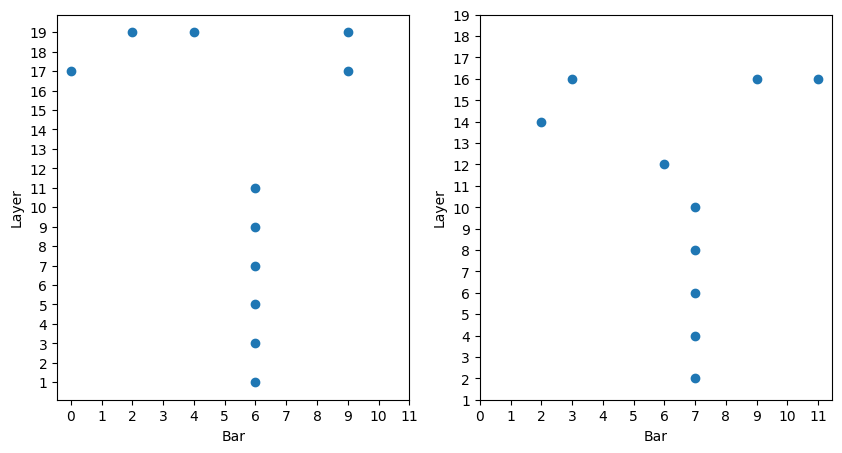

In [45]:
plt.rcParams["figure.figsize"]=(10,5)
plt.subplot(1,2,1)
plt.scatter(single_odd["strip"], single_odd["layer"])
plt.yticks(np.arange(1,20))
plt.xticks(np.arange(0,12))
plt.xlabel("Bar")
plt.ylabel("Layer")

plt.subplot(1,2,2)
plt.scatter(single_even["strip"], single_even["layer"])
plt.yticks(np.arange(1,20))
plt.xticks(np.arange(0,12))
plt.xlabel("Bar")
plt.ylabel("Layer")
plt.show()